In [16]:
from sklearn.preprocessing import LabelBinarizer
import keras, pickle, numpy as np
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Input, Activation, Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [17]:
data_griewank = pickle.load(open("histogram_data/histogram-som-mpl-es-griewank.out", "rb"))
data_rastrigin = pickle.load(open("histogram_data/histogram-som-mpl-es-rastrigin.out", "rb"))
data_sphere = pickle.load(open("histogram_data/histogram-som-mpl-es-sphere.out", "rb"))
data_ackley = pickle.load(open("histogram_data/histogram-som-mpl-es-ackley.out", "rb"))

In [18]:
X, y = [], []

for a,b,c,d in zip(data_ackley, data_griewank, data_rastrigin, data_sphere):
    
    #for elem in [a, b, c, d]:        
    #    X.append(np.reshape(elem[0],newshape=(10,10,1)))
    for elem in [a, b, c, d]:        
        X.append(elem)
        #X.append(a[0]), X.append(b[0]), X.append(c[0]), X.append(d[0])
    #X.append(a[1]), X.append(b[1]), X.append(c[1]), X.append(d[1])
    y.append(0), y.append(1), y.append(2), y.append(3)

In [19]:
X_train, y_train = np.array(X), np.array(y)    
X_train, y_train = np.array(X[:3200]), np.array(y[:3200])
X_test, y_test = np.array(X[-800:]), np.array(y[-800:])

In [20]:
lb = LabelBinarizer()

Y_train = lb.fit_transform(y_train)
Y_train = lb.transform(y_train)
Y_test = lb.transform(y_test)

In [21]:
X_train = X_train.reshape(X_train.shape[0],10,10,2)

In [22]:
input_shape = (10, 10, 2)
num_classes = 4

accs = []

in_x = Input(shape=input_shape)
x = Conv2D(filters=25, kernel_size=(5, 5))(in_x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2), padding='same')(x)
x = Conv2D(filters=16, kernel_size=(3, 3))(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2), padding='same')(x)
x = Flatten()(x)
x = Dense(10)(x)
x = Activation('relu')(x)
x = Dense(50)(x)
x = Activation('relu')(x)
out_x = Dense(num_classes, activation='softmax')(x)

#keras.optimizers.SGD(lr=0.01)
model = Model(inputs=in_x, outputs=out_x)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

h = model.fit(X_train, Y_train, epochs=1000, batch_size=250, verbose=0, validation_split=0.2)
#accs.append(h.history['val_acc'][-1])

In [23]:
inter_output_model = Model(model.input, model.layers[9].output)

In [24]:
out = inter_output_model.predict(X_test.reshape(X_test.shape[0],10,10,2))
out.shape

(800, 10)

In [25]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=300)
tsne_pca_results = tsne.fit_transform(out).T

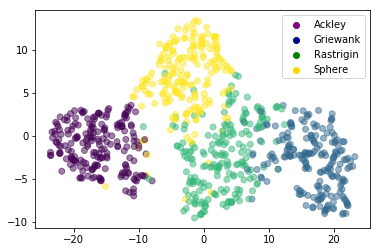

In [26]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

x = tsne_pca_results

if (x.shape[0]==3):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(*x, c=y_test, alpha=0.5)
else:
    labels = ['Ackley','Griewank','Rastrigin','Sphere']
    #colors = [0,1,2,3]
    colors = ['purple','darkblue','green','gold']
    for i,l in enumerate(labels):
        plt.scatter([],[], c=[colors[i]], alpha=1, label=l)
    plt.scatter(*x, c=[y for y in y_test], alpha=.5)
    plt.legend(loc='upper right')
    plt.show()

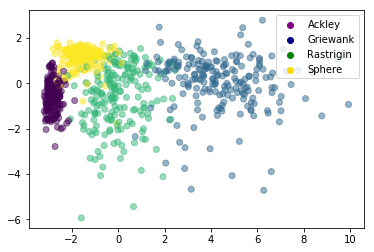

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
lda_x = lda.fit(out, y_test).transform(out).T

#fig = plt.figure()
#plt.figure(figsize=(5, 5))
for i,l in enumerate(labels):
    plt.scatter([],[], c=[colors[i]], alpha=1, label=l)
plt.scatter(*lda_x, c=[y for y in y_test], alpha=.5)
plt.legend(loc='upper right')
plt.savefig('cluster-cnn.pdf')
plt.show()

In [28]:
# list all data in history
print(h.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


<Figure size 432x288 with 0 Axes>

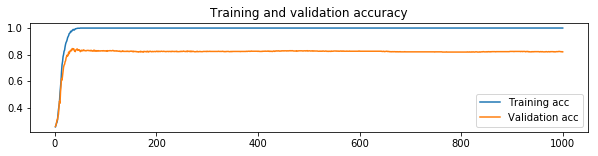

<Figure size 432x288 with 0 Axes>

In [29]:
acc = h.history['acc']
val_acc = h.history['val_acc']
loss = h.history['loss']
val_loss = h.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10, 2))
plt.plot(epochs, acc, '-', label='Training acc')
plt.plot(epochs, val_acc, '-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
#plt.savefig('training-accuracy-cnn.pdf')


plt.figure()

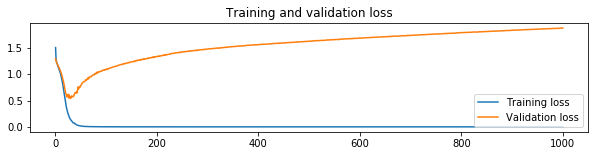

In [30]:
plt.figure(figsize=(10, 2))
plt.plot(epochs, loss, '-', label='Training loss')
plt.plot(epochs, val_loss, '-', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
#plt.savefig('training-loss-cnn.pdf')


plt.show()